In [1]:
#Importing Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch # for Hierarchical cluster
from sklearn.cluster import AgglomerativeClustering # for Hierarchical cluster
from sklearn.cluster import KMeans #for KMeans
from sklearn.cluster import DBSCAN # for DBSCAN
from sklearn.preprocessing import StandardScaler #Normalization func
from sklearn.preprocessing import normalize #Transform the data into a standard normal distribution 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/SANJAY/Desktop/ExcelR/Assignments/Assignment - 7/Clustering/crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime = df.drop(['Unnamed: 0'],axis=1)
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [4]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# K-Means

In [5]:
#Normalization
crime_norm = pd.DataFrame(normalize(crime),columns=(crime.columns))
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


In [6]:
wcss =[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)




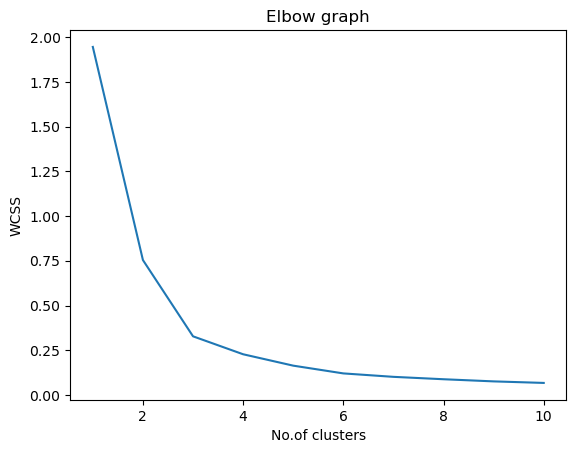

In [7]:
#Elbow graph
plt.plot(range(1,11),wcss)
plt.title("Elbow graph")
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Building the cluster using K=4
clusters = KMeans(4,random_state=30).fit(crime_norm)
clusters

KMeans(n_clusters=4, random_state=30)

In [9]:
clusters.labels_

array([1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 2, 3, 1, 0, 2, 0, 3, 1, 0, 1, 0, 1,
       2, 1, 3, 3, 0, 1, 2, 0, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 3, 1, 3, 0,
       0, 3, 3, 3, 2, 3])

In [10]:
# adding cluster to dataset
crime1 = crime.copy()
crime1['Clusters']=clusters.labels_
crime1.head()

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,1


In [11]:
clusters.cluster_centers_

array([[0.03689098, 0.84108145, 0.52207436, 0.12738443],
       [0.04531605, 0.95994345, 0.24802482, 0.10322567],
       [0.02971377, 0.65577288, 0.73186384, 0.14305726],
       [0.04205536, 0.90426714, 0.40250352, 0.12472689]])

In [12]:
crime1.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.881818,111.363636,68.545455,16.354545
1,1,12.021053,260.526316,66.421053,27.694737
2,2,2.616667,54.833333,62.000000,12.333333
3,3,6.542857,145.285714,63.500000,20.107143


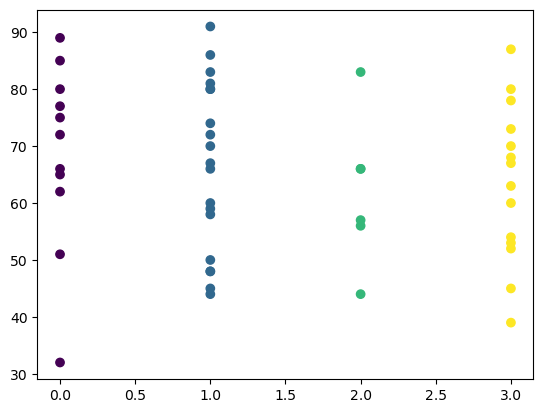

In [13]:
#Plotting
plt.scatter(crime1['Clusters'],crime1['UrbanPop'],c=clusters.labels_)

# Hierarchical Clustering

In [14]:
crime.head()


,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [15]:
#Normalization
def norm_func(i):
    x = (i-i.min())/(i.max() - i.min())
    return(x)

In [16]:
#Normalized dataframe
hc_norm = norm_func(crime)
hc_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


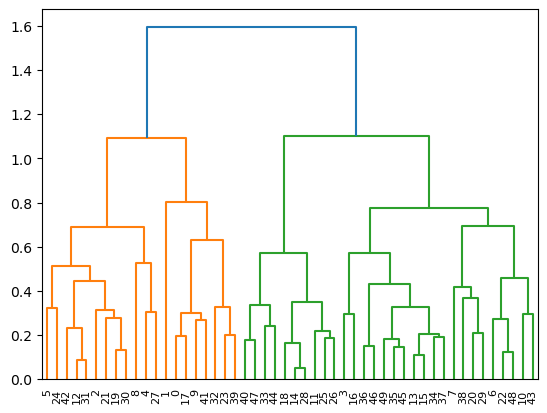

In [17]:
#Dendogram
dendograms = sch.dendrogram(sch.linkage(hc_norm,'complete'))

In [18]:
#Create clusters
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hc

AgglomerativeClustering(n_clusters=3)

In [24]:
hc.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [19]:
y = pd.DataFrame(hc.fit_predict(hc_norm),columns=['Clusters HC'])
y

,Clusters HC
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [21]:
y['Clusters HC'].value_counts()

0    20
1    18
2    12
Name: Clusters HC, dtype: int64

In [27]:
# adding cluster to dataset
crime_hc = crime.copy()
crime_hc['Clusters HC']=hc.labels_
crime_hc

,Murder,Assault,UrbanPop,Rape,Clusters HC
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [29]:
crime_hc.groupby('Clusters HC').agg(['mean']).reset_index()

,Clusters HC,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.165000,255.250000,68.400000,29.165000
1,1,6.055556,140.055556,71.333333,18.683333
2,2,3.091667,76.000000,52.083333,11.833333


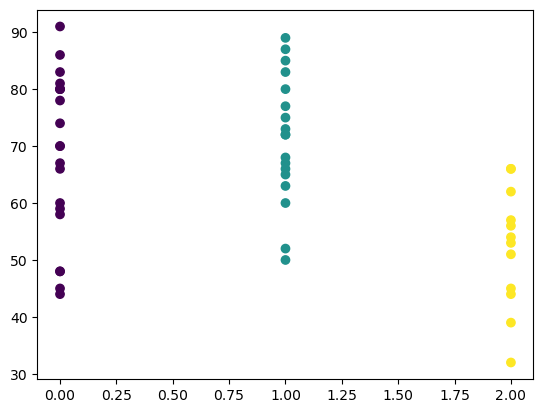

In [30]:
#Plotting
plt.scatter(crime_hc['Clusters HC'],crime_hc['UrbanPop'], c=hc.labels_)

# DBSCAN

In [31]:
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [32]:
crime_db=StandardScaler().fit_transform(crime)
crime_db

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [33]:
#Creating cluster
dbscan = DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_db)

DBSCAN(eps=1, min_samples=4)

In [34]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [36]:
# adding cluster to dataset
crime['Clusters db'] = dbscan.labels_
crime.head()

,Murder,Assault,UrbanPop,Rape,Clusters db
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


In [37]:
crime.groupby('Clusters db').agg(['mean']).reset_index()

,Clusters db,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


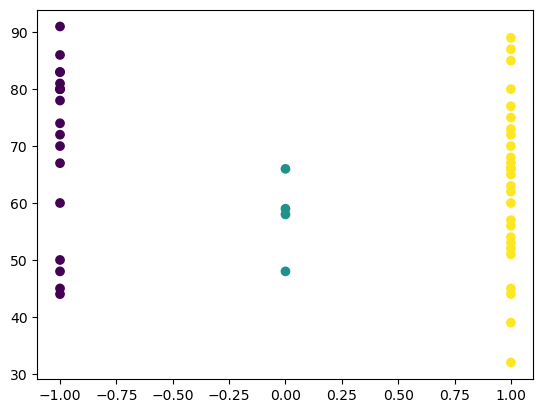

In [38]:
#plotting
plt.scatter(crime['Clusters db'],crime['UrbanPop'], c=dbscan.labels_)